## Homework 2-Yutao Chen

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import pandas as pd
import sklearn
import sklearn.naive_bayes
import sklearn.svm
import sklearn.linear_model
import sklearn.neighbors
import sklearn.model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')

### The Bayes Classifier
#### 1.a. Set your random number generator seed.

In [272]:
np.random.seed(seed=1234)

#### 1.b. Simulate a dataset of $N = 200$ with $X_{1}, X_{2}$ where $X_{1}, X_{2}$ are random uniform variables between $[−1, 1]$.

In [17]:
df1 = pd.DataFrame({'$X_{1}$':sp.stats.uniform.rvs(loc=-1, scale=2, size=200),
                    '$X_{2}$':sp.stats.uniform.rvs(loc=-1, scale=2, size=200)})

#### 1.c. Calculate $Y = X_{1} + X_{1}^2 + X_{2} + X_{2}^2 + \epsilon$, where $\epsilon ∼ N(\mu = 0, \sigma^2 = 0.25)$.

In [18]:
df1['$Y$'] =  df1['$X_{1}$'] + df1['$X_{1}$']**2 + df1['$X_{2}$'] + 
              df1['$X_{2}$']**2 + sp.stats.norm.rvs(loc=0, scale=0.5, size=200)

#### 1.d. $Y$ is defined in terms of the log-odds of success on the domain $[−\infty, +\infty]$. Calculate the probability of success bounded between $[0, 1]$.

In [19]:
df1['$P(success)$'] = 1 - (np.exp(df1['$Y$']) + 1)**(-1)

#### 1.e. Plot each of the data points on a graph and use color to indicate if the observation was a success or a failure.
#### 1.g. Give your plot a meaningful title and axis labels.

In [20]:
for i in range(200):
    df1.loc[i, 'category'] = 'success' if df1.loc[i,'$P(success)$']>=0.5 
    else 'failure'

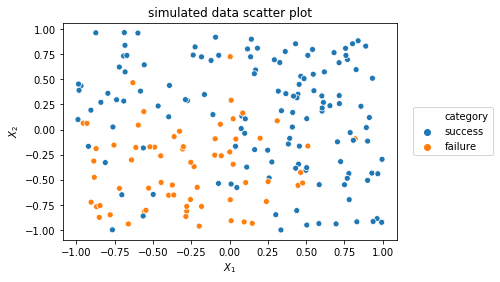

In [6]:
ax1 = sns.scatterplot('$X_{1}$','$X_{2}$',hue='category', data=df1)
ax1.set_title('simulated data scatter plot')
ax1.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.show()

#### 1.f. Overlay the plot with Bayes decision boundary, calculated using $X_{1}, X_{2}$.

In [7]:
# Python is not friendly in drawing decision boundaries,
# we have to manually plot it.
x1_boundary, x2_boundary = np.meshgrid(np.linspace(-1.0, 1.0, 40),
                         np.linspace(-1.0, 1.0, 40)) 
bayes1_clf = sklearn.svm.SVC(kernel = 'rbf', gamma='scale')
bayes1_clf.fit(df1[['$X_{1}$','$X_{2}$']],df1['category'])
prediction_boundary = bayes1_clf.predict(np.c_[x1_boundary.ravel(), 
x2_boundary.ravel()])
prediction_boundary = prediction_boundary.reshape(x1_boundary.shape)

In [8]:
# conversion
for i in range(40):
    for j in range(40):
        prediction_boundary[i][j] = float(1.0) if 
        prediction_boundary[i][j] == 'success' else float(0.0)
prediction_boundary

array([[0.0, 0.0, 0.0, ..., 1.0, 1.0, 1.0],
       [0.0, 0.0, 0.0, ..., 1.0, 1.0, 1.0],
       [0.0, 0.0, 0.0, ..., 1.0, 1.0, 1.0],
       ...,
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0]], dtype=object)

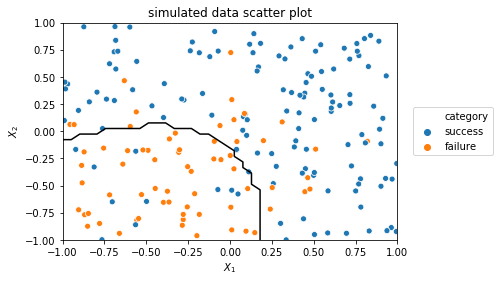

In [9]:
ax1 = sns.scatterplot('$X_{1}$','$X_{2}$',hue='category', data=df1)
ax1.set_title('simulated data scatter plot')
ax1.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
ax1.contour(x1_boundary, x2_boundary, prediction_boundary, colors='black',levels=0)
plt.show()

### Exploring Simulated Differences between LDA and QDA
#### 2. If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set? 

In [23]:
# construct classifiers
LDA_clf = LDA()
QDA_clf = QDA()

In [ ]:
# repeat the following process 1000 times
LDA_training_errors_2 = []
LDA_testing_errors_2 = []
QDA_training_errors_2 = []
QDA_testing_errors_2 = []
for i in range(1000):
    # Simulation of X1, X2 and Y
    df = pd.DataFrame({'X1':np.random.uniform((1e-10)-1,1,1000),
                       'X2':np.random.uniform((1e-10)-1,1,1000)})
    df['Y'] = df['X1'] + df['X2'] + sp.stats.norm.rvs(loc=0, scale=1, size=1000)
    for j in range(1000):
        if df.loc[j,'Y']>=0:
            df.loc[j,'category'] = True
        else:
            df.loc[j,'category'] = False
    # Split the dataset
    train_set, test_set = sklearn.model_selection.train_test_split(df, 
    train_size=0.7,test_size=0.3)
    # LDA training and testing
    LDA_clf.fit(train_set[['X1','X2']],train_set['category'])
    LDA_training_errors_2.append(1-sklearn.metrics.accuracy_score(
    train_set['category'], LDA_clf.predict(train_set[['X1','X2']])))
    LDA_testing_errors_2.append(1-sklearn.metrics.accuracy_score(
    test_set['category'], LDA_clf.predict(test_set[['X1','X2']])))
    # QDA training and testing
    QDA_clf.fit(train_set[['X1','X2']],train_set['category'])
    QDA_training_errors_2.append(1-sklearn.metrics.accuracy_score(
    train_set['category'], QDA_clf.predict(train_set[['X1','X2']])))
    QDA_testing_errors_2.append(1-sklearn.metrics.accuracy_score(
    test_set['category'], QDA_clf.predict(test_set[['X1','X2']])))

In [ ]:
# show the table
linear_errors_df = pd.DataFrame({"LDA_Train":LDA_training_errors_2,
                                 "LDA_Test":LDA_testing_errors_2,
                                 "QDA_Train":QDA_training_errors_2,
                                 "QDA_Test":QDA_testing_errors_2})

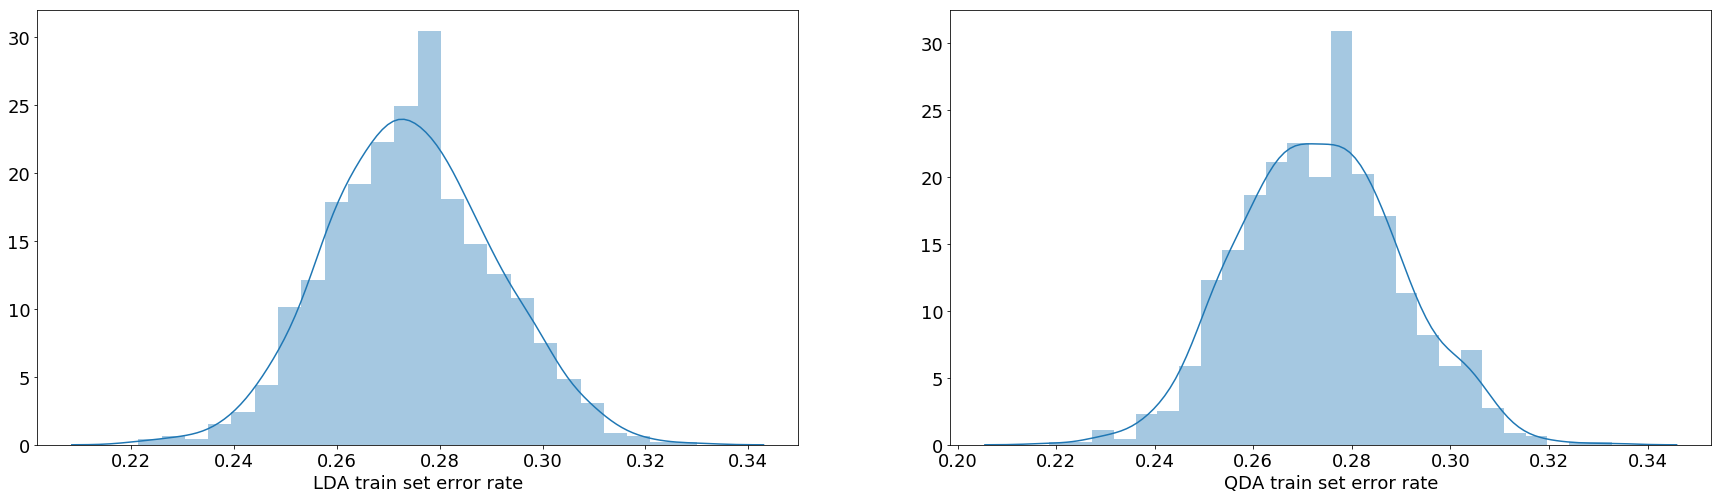

In [190]:
# show the training set graph result 
plt.rcParams["figure.figsize"] = (30,8)
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(1,2) 
sns.distplot(linear_errors_df['LDA_Train'], 
             axlabel='LDA train set error rate', ax = axes[0])
sns.distplot(linear_errors_df['QDA_Train'], 
             axlabel='QDA train set error rate', ax = axes[1])
plt.show()

In [191]:
print("Mean error rate for LDA training set: {}".format(
       linear_errors_df['LDA_Train'].mean()))
print("std of error rates of LDA training set: {}".format(
       linear_errors_df['LDA_Train'].std()))
print("Mean error rate for QDA training set: {}".format(
       linear_errors_df['QDA_Train'].mean()))
print("std of error rates of QDA training set: {}".format(
       linear_errors_df['QDA_Train'].std()))

Mean error rate for LDA training set: 0.2744400000000004
std of error rates of LDA training set: 0.016221129283724996
Mean error rate for QDA training set: 0.2734885714285716
std of error rates of QDA training set: 0.01634047631705727


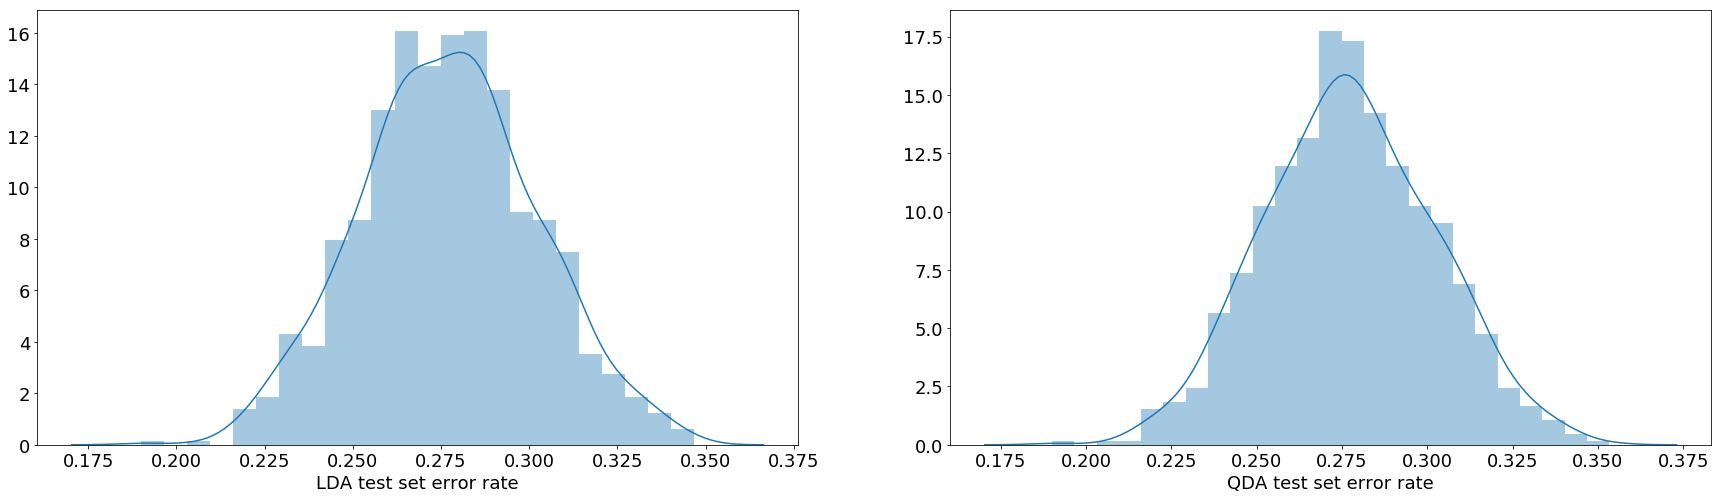

In [194]:
# show the testing set graph result 
plt.rcParams["figure.figsize"] = (30,8)
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(1,2) 
sns.distplot(linear_errors_df['LDA_Test'], 
axlabel='LDA test set error rate', ax = axes[0])
sns.distplot(linear_errors_df['QDA_Test'], 
axlabel='QDA test set error rate', ax = axes[1])
plt.show()

In [193]:
print("Mean error rate for LDA testing set: {}".format(
       linear_errors_df['LDA_Test'].mean()))
print("std of error rates of LDA testing set: {}".format(
       linear_errors_df['LDA_Test'].std()))
print("Mean error rate for QDA testing set: {}".format(
       linear_errors_df['QDA_Test'].mean()))
print("std of error rates of QDA testing set: {}".format(
       linear_errors_df['QDA_Test'].std()))

Mean error rate for LDA testing set: 0.27703333333333297
std of error rates of LDA testing set: 0.025093729312447046
Mean error rate for QDA testing set: 0.27727333333333304
std of error rates of QDA testing set: 0.025093502378891148


Based on the above data, I found that under the condition of linear Bayesian decision boundaries, using LDA or QDA did not make a significant difference in the prediction error rate. I think one of the reasons leading to this result is that in the process of data generation, data belonging to different classes could have very close variances (from the same distribution), which largely meets the assumptions of LDA. Still, we can see some tiny differences from the mean values of error rate of LDA and QDA. In the training set, the QDA error rate is slightly lower than LDA, but in the testing set, the QDA error rate is slightly higher than LDA. This signal seems to suggest that QDA is suspected of overfitting in this scenario.

#### 3. If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

In [195]:
# repeat the following process 1000 times
LDA_training_errors_3 = []
LDA_testing_errors_3 = []
QDA_training_errors_3 = []
QDA_testing_errors_3 = []
for i in range(1000):
    # Simulation of X1, X2 and Y
    df = pd.DataFrame({'X1':np.random.uniform((1e-10)-1,1,1000),
                       'X2':np.random.uniform((1e-10)-1,1,1000)})
    df['Y'] = df['X1'] + df['X1']**2 + df['X2'] + df['X2']**2 + 
              sp.stats.norm.rvs(loc=0, scale=1, size=1000)
    for j in range(1000):
        if df.loc[j,'Y']>=0:
            df.loc[j,'category'] = True
        else:
            df.loc[j,'category'] = False
    # Split the dataset
    train_set, test_set = sklearn.model_selection.train_test_split(df, 
                                         train_size=0.7,test_size=0.3)
    # LDA training and testing
    LDA_clf.fit(train_set[['X1','X2']],train_set['category'])
    LDA_training_errors_3.append(1-sklearn.metrics.accuracy_score(
    train_set['category'], LDA_clf.predict(train_set[['X1','X2']])))
    LDA_testing_errors_3.append(1-sklearn.metrics.accuracy_score(
    test_set['category'], LDA_clf.predict(test_set[['X1','X2']])))
    # QDA training and testing
    QDA_clf.fit(train_set[['X1','X2']],train_set['category'])
    QDA_training_errors_3.append(1-sklearn.metrics.accuracy_score(
    train_set['category'], QDA_clf.predict(train_set[['X1','X2']])))
    QDA_testing_errors_3.append(1-sklearn.metrics.accuracy_score(
    test_set['category'], QDA_clf.predict(test_set[['X1','X2']])))

In [ ]:
# show the table
nonlinear_errors_df = pd.DataFrame({"LDA_Train":LDA_training_errors_3,
                                    "LDA_Test":LDA_testing_errors_3,
                                    "QDA_Train":QDA_training_errors_3,
                                    "QDA_Test":QDA_testing_errors_3})

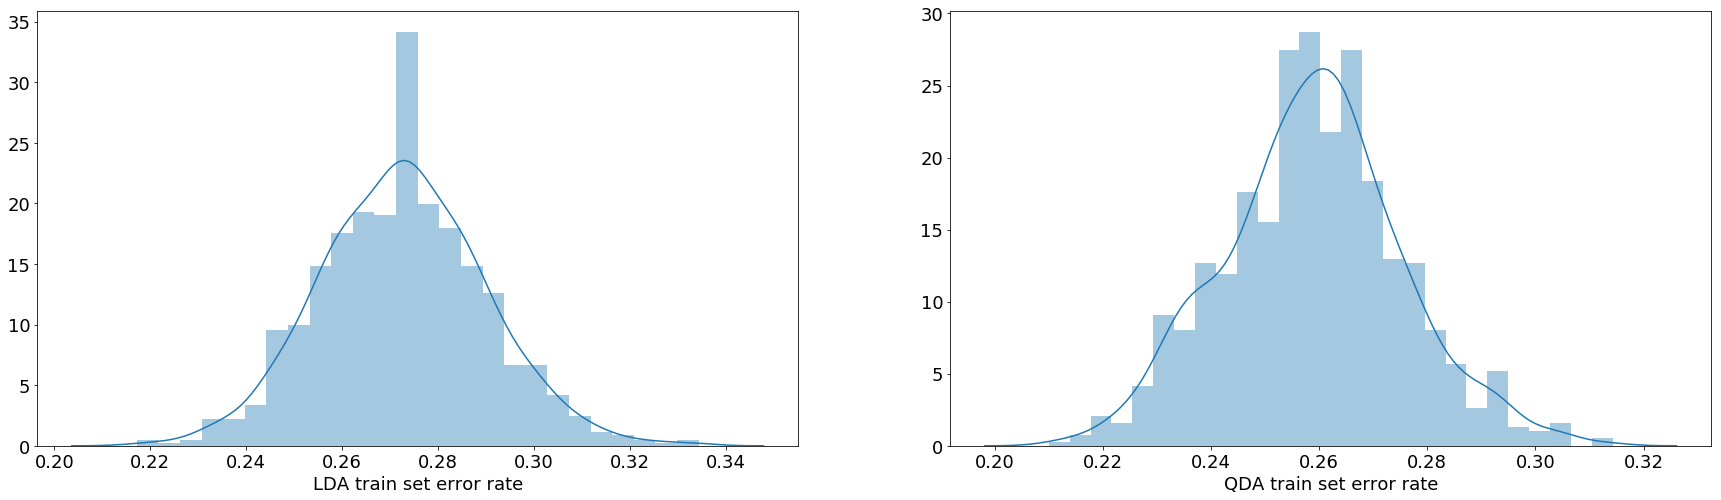

In [197]:
# show the training set graph result 
plt.rcParams["figure.figsize"] = (30,8)
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(1,2) 
sns.distplot(nonlinear_errors_df['LDA_Train'], 
axlabel='LDA train set error rate', ax = axes[0])
sns.distplot(nonlinear_errors_df['QDA_Train'],
axlabel='QDA train set error rate', ax = axes[1])
plt.show()

In [198]:
print("Mean error rate for LDA training set: {}".format(
    nonlinear_errors_df['LDA_Train'].mean()))
print("std of error rates of LDA training set: {}".format(
    nonlinear_errors_df['LDA_Train'].std()))
print("Mean error rate for QDA training set: {}".format(
    nonlinear_errors_df['QDA_Train'].mean()))
print("std of error rates of QDA training set: {}".format(
    nonlinear_errors_df['QDA_Train'].std()))

Mean error rate for LDA training set: 0.2726257142857144
std of error rates of LDA training set: 0.01717748516543834
Mean error rate for QDA training set: 0.25886142857142896
std of error rates of QDA training set: 0.016560598380639717


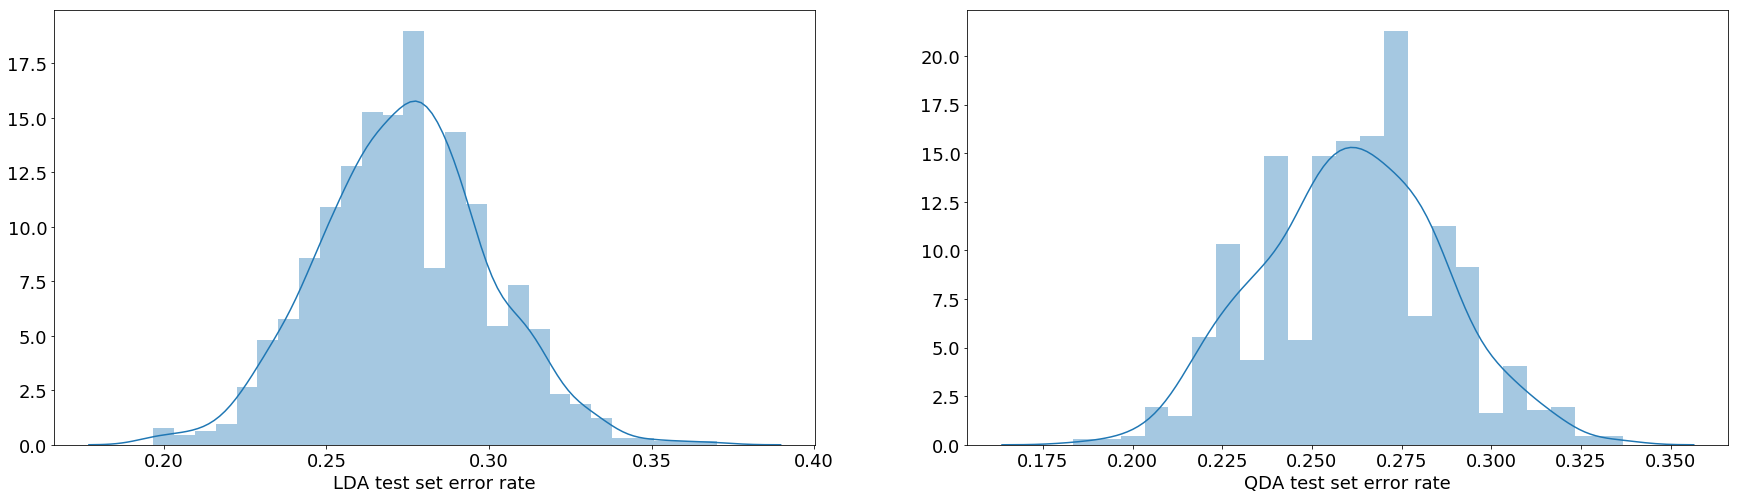

In [199]:
# show the testing set graph result 
plt.rcParams["figure.figsize"] = (30,8)
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(1,2) 
sns.distplot(nonlinear_errors_df['LDA_Test'], 
axlabel='LDA test set error rate', ax = axes[0])
sns.distplot(nonlinear_errors_df['QDA_Test'], 
axlabel='QDA test set error rate', ax = axes[1])
plt.show()

In [200]:
print("Mean error rate for LDA testing set: {}".format(
    nonlinear_errors_df['LDA_Test'].mean()))
print("std of error rates of LDA testing set: {}".format(
    nonlinear_errors_df['LDA_Test'].std()))
print("Mean error rate for QDA testing set: {}".format(
    nonlinear_errors_df['QDA_Test'].mean()))
print("std of error rates of QDA testing set: {}".format(
    nonlinear_errors_df['QDA_Test'].std()))

Mean error rate for LDA testing set: 0.273976666666666
std of error rates of LDA testing set: 0.025913142350978222
Mean error rate for QDA testing set: 0.26094999999999985
std of error rates of QDA testing set: 0.02521529474082438


When using non-linear Bayes decision boundaries, QDA shows the advantages of its flexibility (less bias). In the comparison of both training and testing sets, the error rate is lower than that of LDA. Also, noticing that in both cases the error rates of training and testing data sets are very close, these suggested that the distribution of the two parts are quite close, so that the model's capability to predict does not differ a lot between training and testing data.  

#### 4. In general, as sample size $n$ increases, do we expect the test error rate of QDA relative to LDA to improve, decline, or be unchanged? Why?

In [253]:
%%writefile k_sample.py
#for k in (1e02, 1e03, 1e04, 1e05):
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import sklearn.metrics
import numpy as np
import pandas as pd
import scipy as sp

def k_sample(k):
    LDA_clf = LDA()
    QDA_clf = QDA()
    LDA_train__error = []
    LDA_test__error = []
    QDA_train__error =[]
    QDA_test__error  =[]
    for i in range(1000):
        # Simulation of X1, X2 and Y
        df = pd.DataFrame({'X1':np.random.uniform((1e-10)-1,1,int(k)),
                           'X2':np.random.uniform((1e-10)-1,1,int(k))})
        df['Y'] = df['X1'] + df['X1']**2 + df['X2'] + df['X2']**2 + 
        sp.stats.norm.rvs(loc=0, scale=1, size=int(k))
        df['category'] = [y>=0 for y in df['Y']]
        # Split the dataset
        train_set, test_set = sklearn.model_selection.train_test_split(df, 
        train_size=0.7,test_size=0.3)
        # LDA training and testing
        LDA_clf.fit(train_set[['X1','X2']],train_set['category'])
        LDA_train__error.append(1-sklearn.metrics.accuracy_score(
        train_set['category'], LDA_clf.predict(train_set[['X1','X2']])))
        LDA_test__error.append(1-sklearn.metrics.accuracy_score(
        test_set['category'], LDA_clf.predict(test_set[['X1','X2']])))
        # QDA training and testing
        QDA_clf.fit(train_set[['X1','X2']],train_set['category'])
        QDA_train__error.append(1-sklearn.metrics.accuracy_score(
        train_set['category'], QDA_clf.predict(train_set[['X1','X2']])))
        QDA_test__error.append(1-sklearn.metrics.accuracy_score(
        test_set['category'], QDA_clf.predict(test_set[['X1','X2']])))
    return (k, LDA_train__error, LDA_test__error, 
               QDA_train__error, QDA_test__error)

Overwriting k_sample.py


In [254]:
# multiprocessing
import k_sample
from multiprocessing import Pool

p = Pool(4)
k_sample_result = p.map(k_sample.k_sample, (1e02, 1e03, 1e04, 1e05))

In [233]:
# repeat the following process 1000 times
LDA_training_errors_4 = {1e02:[], 1e03:[], 1e04:[], 1e05:[]}
LDA_testing_errors_4 = {1e02:[], 1e03:[], 1e04:[], 1e05:[]}
QDA_training_errors_4 = {1e02:[], 1e03:[], 1e04:[], 1e05:[]}
QDA_testing_errors_4 = {1e02:[], 1e03:[], 1e04:[], 1e05:[]}

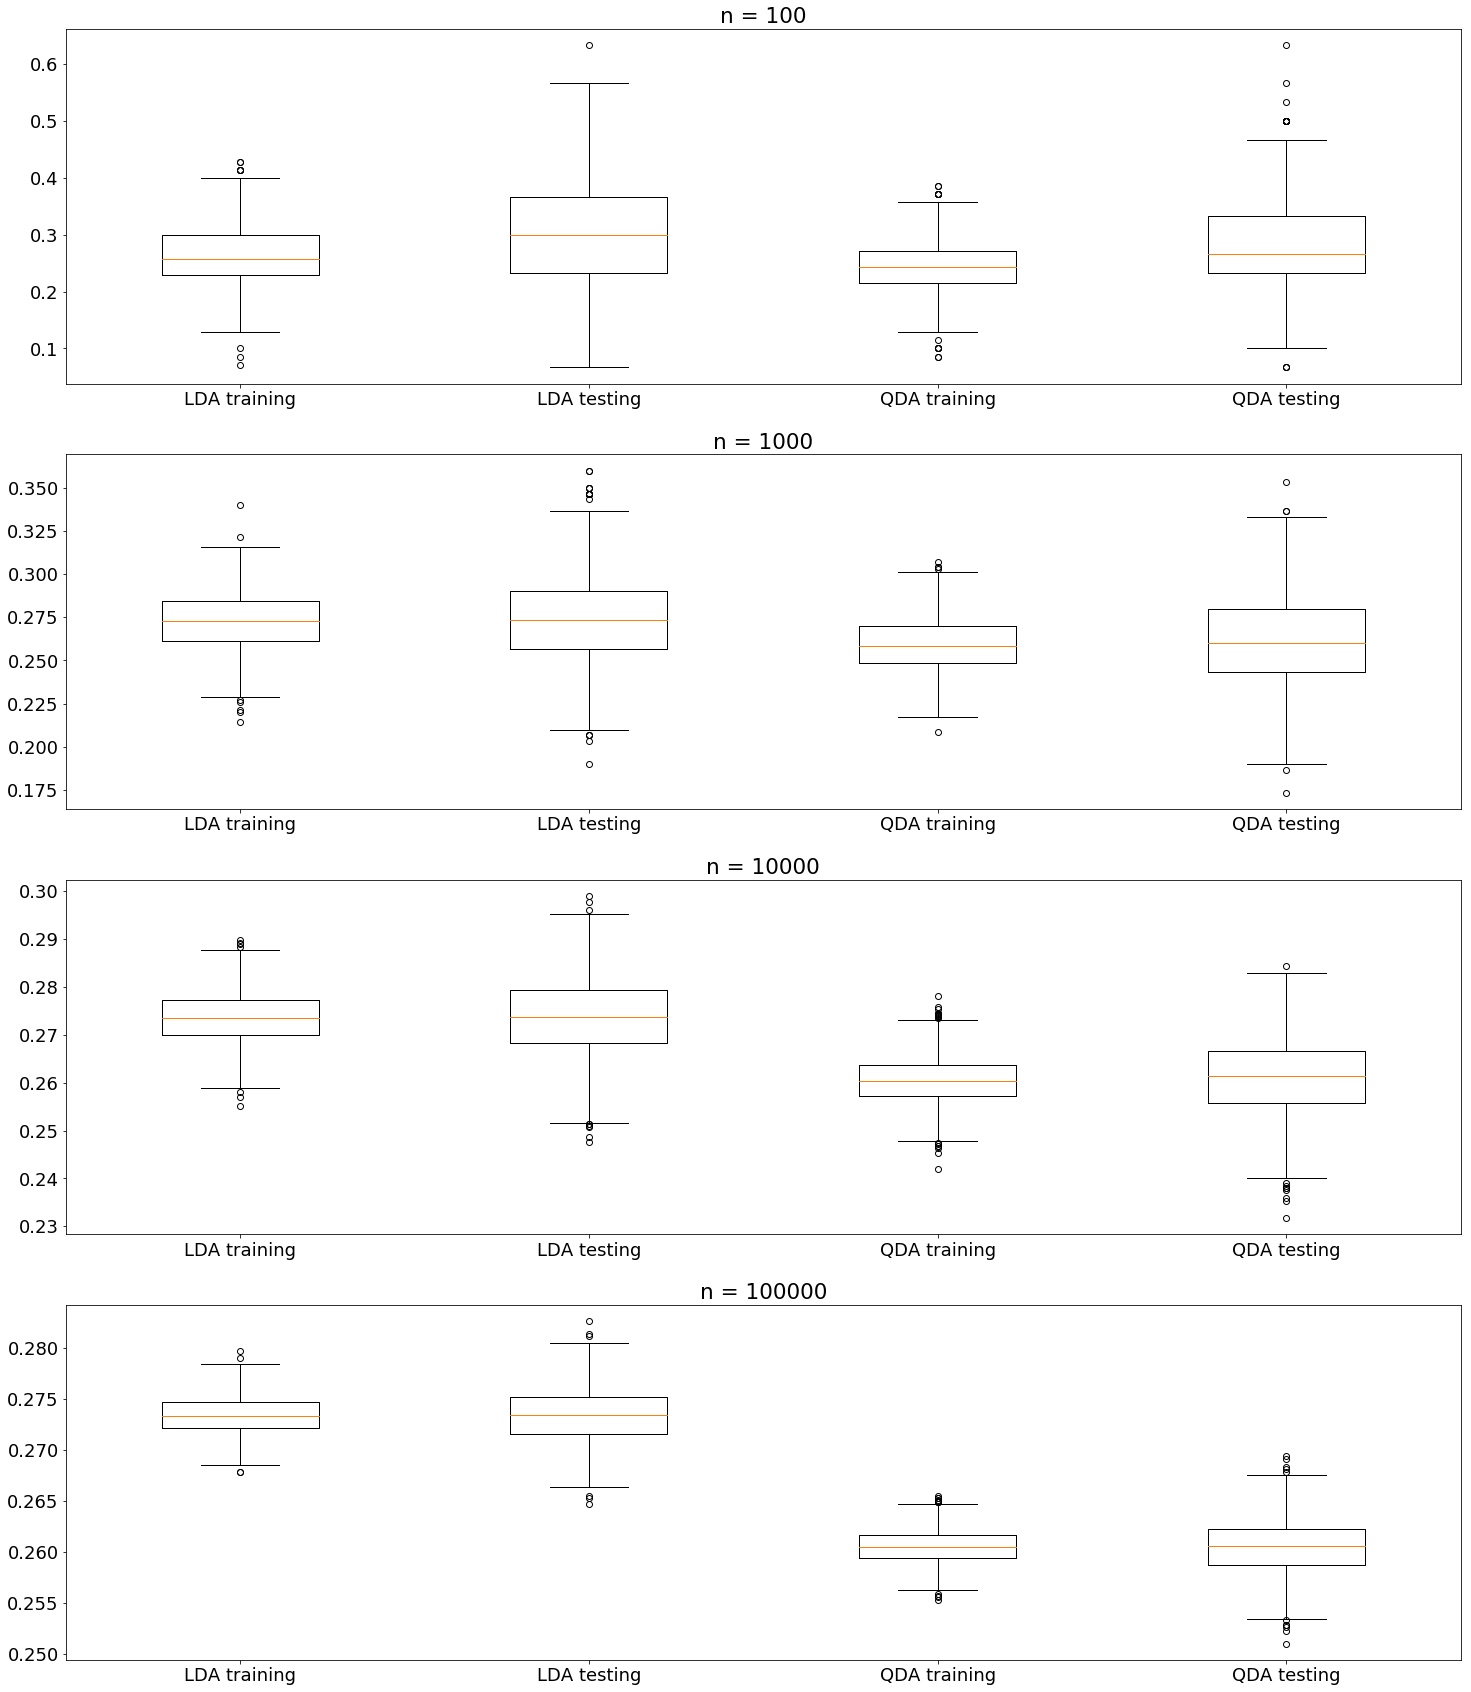

In [270]:
for result in k_sample_result:
    LDA_training_errors_4[result[0]] = result[1]
    LDA_testing_errors_4[result[0]] = result[2]
    QDA_training_errors_4[result[0]] = result[3]
    QDA_testing_errors_4[result[0]] = result[4]

# plot the boxplot with the variance of n
fig, axes = plt.subplots(4,1)
plt.rcParams["figure.figsize"] = (20,30)
for i in range(4):
    axes[i].boxplot([LDA_training_errors_4[10**(2+i)],
                     LDA_testing_errors_4[10**(2+i)],
                     QDA_training_errors_4[10**(2+i)],
                     QDA_testing_errors_4[10**(2+i)]], 
                    labels = ['LDA training','LDA testing',
                              'QDA training','QDA testing'])
    axes[i].set_title("n = {}".format(10**(i+2)))
plt.show()

From the above box plots, as the volume of simulated data becomes larger, the prediction error rates of LDA and QDA are more stable, and the error rates of both classifiers are gradually decreasing. Comparing the two, we can find that with the increase of the amount of simulated data, the superiority of QDA is gradually reflected, and the difference between the error rates of LDA and QDA is increasing. This shows that when faced with a large amount of data, QDA is more able to capture the variability in the data, but when the amount of data is small, QDA is more likely to appear overfitting (see Figure where n = 100)

### Modeling voter turnout
#### 5.a. Split the data into a training and test set (70/30).

In [10]:
# loading data and pre-processing
health_df = pd.read_csv("mental_health.csv")
health_df = health_df.dropna()
health_df = health_df.astype({'vote96': 'category'})
health_df.dtypes

vote96         category
mhealth_sum     float64
age             float64
educ            float64
black             int64
female            int64
married         float64
inc10           float64
dtype: object

In [11]:
# split the dataset
health_train_set, health_test_set = sklearn.model_selection.train_test_split(
health_df, train_size=0.7,test_size=0.3)

#### 5.b. Using the training set and all important predictors, estimate the following models with vote96 as the response variable

In [12]:
# Building classifiers
clf_logistic = sklearn.linear_model.LogisticRegression()
clf_lda = LDA()
clf_qda = QDA()
clf_bayes = sklearn.naive_bayes.BernoulliNB()
clf_knn = [sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) 
           for i in range(1,11)]

In [13]:
# fitting models
clf_logistic.fit(health_train_set.iloc[:,1:],health_train_set['vote96'])
clf_lda.fit(health_train_set.iloc[:,1:],health_train_set['vote96'])
clf_qda.fit(health_train_set.iloc[:,1:],health_train_set['vote96'])
clf_bayes.fit(health_train_set.iloc[:,1:],health_train_set['vote96'])
for clf in clf_knn:
    clf.fit(health_train_set.iloc[:,1:],health_train_set['vote96'])

#### 5.c. Using the test set, calculate the following model performance metrics: i. Error rate ii. ROC curve(s) / Area under the curve (AUC)

In [14]:
metrics_df = pd.DataFrame(columns=['Classifier','Error_Rate','ROC-AUC'])

# logistic regression metrics
logistic_result = clf_logistic.predict(health_test_set.iloc[:,1:])
metrics_df.loc[len(metrics_df)] = ['Logistic Regression',
1-sklearn.metrics.accuracy_score(health_test_set['vote96'], logistic_result),
sklearn.metrics.roc_auc_score(health_test_set['vote96'], logistic_result)]       

# LDA metrics
lda_result = clf_lda.predict(health_test_set.iloc[:,1:])
metrics_df.loc[len(metrics_df)] = ['LDA',
1-sklearn.metrics.accuracy_score(health_test_set['vote96'], lda_result),
sklearn.metrics.roc_auc_score(health_test_set['vote96'], lda_result)] 

# QDA metrics
qda_result = clf_qda.predict(health_test_set.iloc[:,1:])
metrics_df.loc[len(metrics_df)] = ['QDA',
1-sklearn.metrics.accuracy_score(health_test_set['vote96'], qda_result),
sklearn.metrics.roc_auc_score(health_test_set['vote96'], qda_result)] 

# Naive Bayes metrics
bayes_result = clf_bayes.predict(health_test_set.iloc[:,1:])
metrics_df.loc[len(metrics_df)] = ['Naive Bayes',
1-sklearn.metrics.accuracy_score(health_test_set['vote96'], bayes_result),
sklearn.metrics.roc_auc_score(health_test_set['vote96'], bayes_result)] 

# KNN metrics
for i in range(1,11):
    knn_result = clf_knn[i-1].predict(health_test_set.iloc[:,1:])
    metrics_df.loc[len(metrics_df)] = ['KNN(k={})'.format(i),
    1-sklearn.metrics.accuracy_score(health_test_set['vote96'], knn_result),
    sklearn.metrics.roc_auc_score(health_test_set['vote96'], knn_result)] 
metrics_df

,Classifier,Error_Rate,ROC-AUC
0,Logistic Regression,0.254286,0.627214
1,LDA,0.254286,0.641643
2,QDA,0.294286,0.633618
3,Naive Bayes,0.291429,0.500000
4,KNN(k=1),0.351429,0.578866
5,KNN(k=2),0.425714,0.572620
6,KNN(k=3),0.345714,0.559812
7,KNN(k=4),0.360000,0.593019
8,KNN(k=5),0.340000,0.560958
9,KNN(k=6),0.351429,0.587524


#### 5.d. Which model performs the best? Be sure to define what you mean by “best” and identify supporting evidence to support your conclusion(s).

In [15]:
metrics_df.loc[metrics_df['Error_Rate'] == min(metrics_df['Error_Rate']),:]

,Classifier,Error_Rate,ROC-AUC
0,Logistic Regression,0.254286,0.627214
1,LDA,0.254286,0.641643


In [16]:
metrics_df.loc[metrics_df['ROC-AUC'] == max(metrics_df['ROC-AUC']),:]

,Classifier,Error_Rate,ROC-AUC
1,LDA,0.254286,0.641643


In this classification experiment, if we use the error rate (accuracy) to measure, the models with the best classification capability are the logistic regression model and the LDA model. Among all models, their error rate is the lowest. If ROC-AUC is used as the evaluation index, then the LDA model is the best, since its ROC-AUC area value is the largest, indicating that the cost of correct classification (the misclassification that occurs at the same time) is the smallest. Overall, I think the LDA model overshadows the other models for this mental health data set.